In [1]:
import os

In [2]:
data_dir = "C:/Users/Dell/Desktop/pac/Quater 3/Cats and dogs Classification/Cats and Dogs Classification data"

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
file_sample = [os.path.join(data_dir,os.listdir(data_dir)[i]) for i in range(len(os.listdir(data_dir)))]

k = 0
images = np.zeros((4000,150,150,3))
for j in file_sample:
    img = plt.imread(j)
    img = np.compress((150,150,3),img)
    images[k] =img
    
k = 0
image_ = np.zeros((4000,150,150,3))
for j in file_sample:
    img = image.load_img(j)
    dat = image.img_to_array(img)
    img = np.compress((150,150,3),img)
    images[k] =img
    
    
    
    
# we can't get images until and unless we have images with the same shape 


In [4]:
images[0].shape

(150, 150, 3)

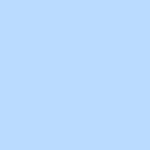

In [5]:
image.array_to_img(images[0])

In [6]:
Base_dir = "C:/Users/Dell/Desktop/pac/Quater 3/Practice/data_directories"
train_dir = os.path.join(Base_dir,"train")
train_cats_dir = os.path.join(train_dir,"cats")
train_dogs_dir = os.path.join(train_dir,"dogs")
val_dir = os.path.join(Base_dir,"val")
val_cats_dir = os.path.join(val_dir,"cats")
val_dogs_dir = os.path.join(val_dir,"dogs")
test_dir = os.path.join(Base_dir,"test")
test_cats_dir = os.path.join(test_dir,"cats")
test_dogs_dir = os.path.join(test_dir,"dogs")

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255 ,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True )
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size = 20, class_mode = "binary")
val_generator = val_datagen.flow_from_directory(val_dir, target_size = (150,150), batch_size = 20, class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss = "binary_crossentropy" , optimizer = "rmsprop" , metrics=["acc"])

In [10]:
model.fit(train_generator,epochs=5,steps_per_epoch=100,validation_data=val_generator,validation_steps=50)

Train for 100 steps, validate for 50 steps
Epoch 1/5
100/100 [==============================] - 149s 1s/step - loss: 0.7051 - acc: 0.5140 - val_loss: 0.6817 - val_acc: 0.5480
Epoch 2/5
100/100 [==============================] - 178s 2s/step - loss: 0.6969 - acc: 0.5540 - val_loss: 0.6432 - val_acc: 0.6190
Epoch 3/5
100/100 [==============================] - 152s 2s/step - loss: 0.6789 - acc: 0.5985 - val_loss: 0.6384 - val_acc: 0.6520
Epoch 4/5
100/100 [==============================] - 160s 2s/step - loss: 0.6660 - acc: 0.6200 - val_loss: 0.6300 - val_acc: 0.6440
Epoch 5/5
100/100 [==============================] - 159s 2s/step - loss: 0.6582 - acc: 0.6290 - val_loss: 0.6078 - val_acc: 0.6570


In [11]:
model.evaluate()

ValueError: When using data tensors as input to a model, you should specify the `steps` argument.